In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# GMNN model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`


In [6]:
from graphgallery.nn.models import GMNN
model = GMNN(adj, x, labels, device='GPU', norm_x='l1', seed=123)
model.build()
# train with validation
histories = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


  0%|          | 0/100 [00:00<?, ?it/s]

<Loss = 0.4996 Acc = 0.9500 Val_Loss = 0.9498 Val_Acc = 0.7960 >: 100%|██████████| 100/100 [00:01<00:00, 66.36it/s]


<Loss = 0.1392 Acc = 0.9645 Val_Loss = 1.4482 Val_Acc = 0.8160 >: 100%|██████████| 100/100 [00:00<00:00, 104.44it/s]
<Loss = 0.6728 Acc = 0.8792 Val_Loss = 0.9066 Val_Acc = 0.8000 >: 100%|██████████| 100/100 [00:00<00:00, 116.61it/s]


Test loss 0.75784, Test accuracy 83.20%


## Show model summary

In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_q (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
adj_matrix (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
graph_convolution_2 (GraphConvo (None, 16)           22928       input_q[0][0]                    
                                                                 adj_matrix[0][0]                 
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16)           0           graph_convolution_2[0][0]  

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+-----------------------------+
|    Parameters     |            Value            |
+===================+=============================+
| Name              | GMNN                        |
+-------------------+-----------------------------+
| as_model          | False                       |
+-------------------+-----------------------------+
| callbacks         | None                        |
+-------------------+-----------------------------+
| early_stop_metric | val_loss                    |
+-------------------+-----------------------------+
| early_stopping    | None                        |
+-------------------+-----------------------------+
| epochs            | 100                         |
+-------------------+-----------------------------+
| kwargs            | {}                          |
+-------------------+-----------------------------+
| monitor           | val_acc                     |
+-------------------+-----------------------------+
| pre_train_

In [9]:
# show model parameters
model.show('model')

+-------------+----------+
| Parameters  |  Value   |
+=============+==========+
| Name        | GMNN     |
+-------------+----------+
| activations | ['relu'] |
+-------------+----------+
| dropouts    | [0.6]    |
+-------------+----------+
| hiddens     | [16]     |
+-------------+----------+
| l2_norms    | [0.0005] |
+-------------+----------+
| lr          | 0.050    |
+-------------+----------+
| use_bias    | False    |
+-------------+----------+


In [10]:
# By defaule, show all
model.show()

+-------------------+-----------------------------+
|    Parameters     |            Value            |
+===================+=============================+
| Name              | GMNN                        |
+-------------------+-----------------------------+
| activations       | ['relu']                    |
+-------------------+-----------------------------+
| as_model          | False                       |
+-------------------+-----------------------------+
| callbacks         | None                        |
+-------------------+-----------------------------+
| device            | GPU                         |
+-------------------+-----------------------------+
| dropouts          | [0.6]                       |
+-------------------+-----------------------------+
| early_stop_metric | val_loss                    |
+-------------------+-----------------------------+
| early_stopping    | None                        |
+-------------------+-----------------------------+
| epochs    

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


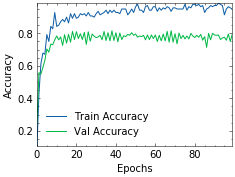

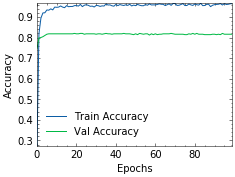

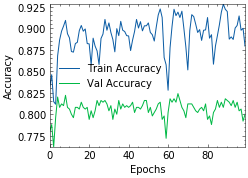

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
for his in histories:
    with plt.style.context(['science', 'no-latex']):
        plt.plot(his.history['acc'])
        plt.plot(his.history['val_acc'])
        plt.legend(['Train Accuracy', 'Val Accuracy'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.autoscale(tight=True)
        plt.show()    

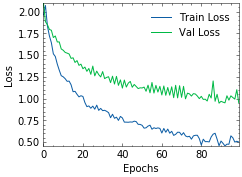

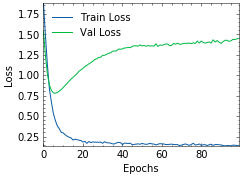

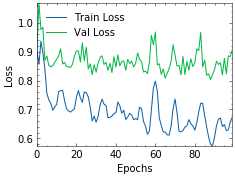

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
for his in histories:
    with plt.style.context(['science', 'no-latex']):
        plt.plot(his.history['loss'])
        plt.plot(his.history['val_loss'])
        plt.legend(['Train Loss', 'Val Loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.autoscale(tight=True)
        plt.show()    